**IMPORTING MODULE OR PACKAGE**

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import kagglehub
import pandas as pds
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [37]:
# Download latest version
path = kagglehub.dataset_download("vijayuv/onlineretail")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\faiz\.cache\kagglehub\datasets\vijayuv\onlineretail\versions\1


In [38]:
pd = pd.read_csv(path + "/OnlineRetail.csv", encoding="ISO-8859-1")
pd.head()
#

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [39]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
pd.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [41]:
# Cara 1: Menggunakan nunique()
jumlah_pelanggan = pd['CustomerID'].nunique()
print(f"Jumlah pelanggan unik: {jumlah_pelanggan}")

# Cara 2: Menggunakan len() dan unique()
jumlah_pelanggan_2 = len(pd['CustomerID'].unique())
print(f"Jumlah pelanggan unik (metode 2): {jumlah_pelanggan_2}")

# Cara 3: Menggunakan value_counts()
jumlah_transaksi_per_pelanggan = pd['CustomerID'].value_counts()
print("\nDistribusi jumlah transaksi per pelanggan:")
print(jumlah_transaksi_per_pelanggan.head())

Jumlah pelanggan unik: 4372
Jumlah pelanggan unik (metode 2): 4373

Distribusi jumlah transaksi per pelanggan:
CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
Name: count, dtype: int64


In [42]:
# Verifikasi
print("Jumlah NaN per kolom setelah pembersihan:")
print(pd.isnull().sum())

Jumlah NaN per kolom setelah pembersihan:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [43]:
# Verifikasi sebelum pembersihan
print("Sebelum pembersihan: baris =", len(pd))

# Hapus baris yang memiliki NaN pada kolom CustomerID langsung di pd
pd.dropna(subset=['CustomerID'], inplace=True)

# Jika ingin menghapus semua baris yang mengandung NaN di mana pun, gunakan:
# pd.dropna(inplace=True)

print("Setelah pembersihan (dropna pada CustomerID): baris =", len(pd))

# Verifikasi jumlah NaN per kolom
print("\nJumlah NaN per kolom setelah pembersihan:")
print(pd.isnull().sum())


Sebelum pembersihan: baris = 541909
Setelah pembersihan (dropna pada CustomerID): baris = 406829

Jumlah NaN per kolom setelah pembersihan:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Konversi Invoicejadi date time

In [44]:
pd['InvoiceDate'] = pds.to_datetime(pd['InvoiceDate'])
pd['InvoiceDate'].dtype
pd['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

10 NEgara terbanyak 

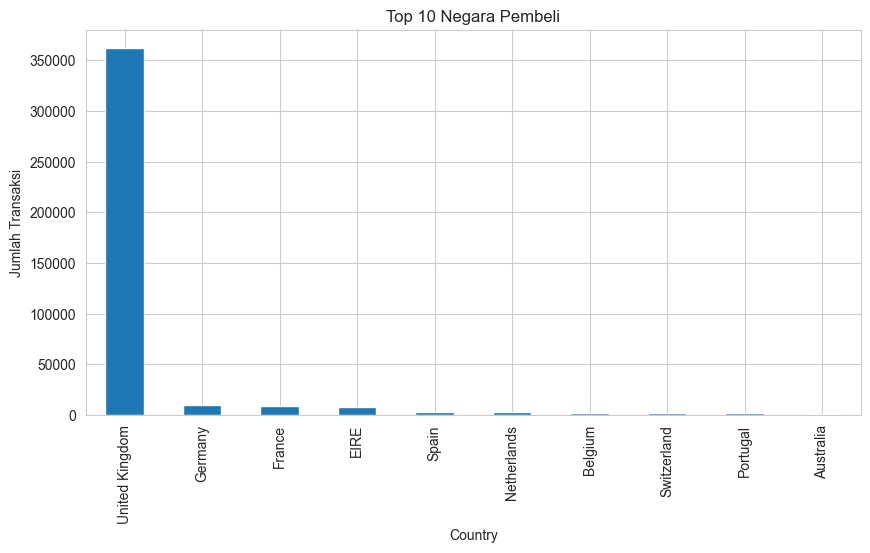

In [45]:
plt.figure(figsize=(10,5))
pd['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Negara Pembeli")
plt.ylabel("Jumlah Transaksi")
plt.show()


Distribusi Harga Produk

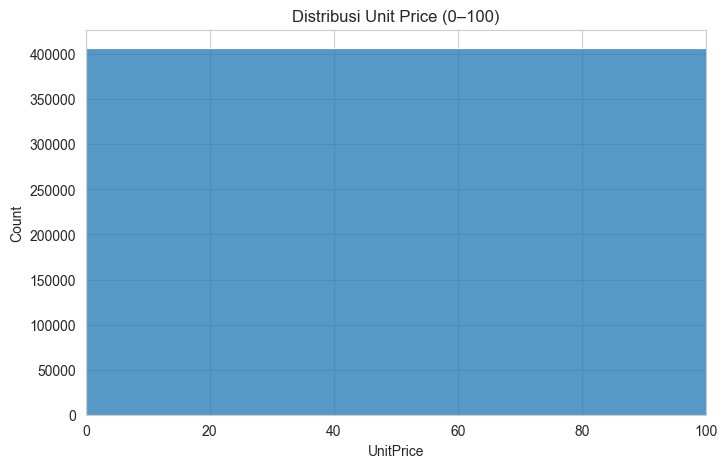

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(pd['UnitPrice'], bins=50)
plt.xlim(0,100)
plt.title("Distribusi Unit Price (0–100)")
plt.show()


distribusi quantitiy

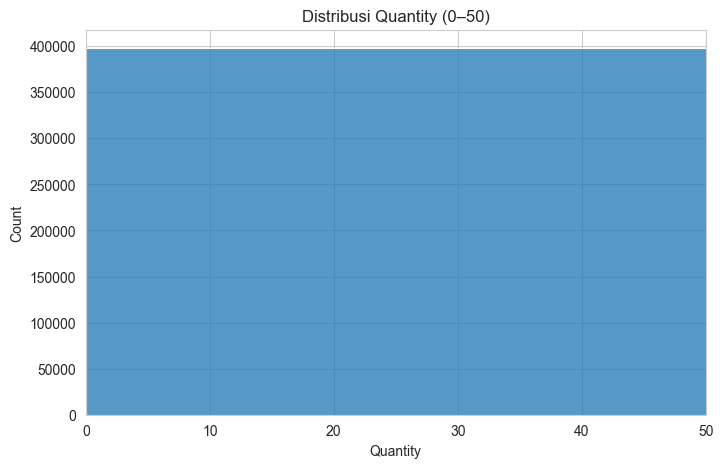

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(pd['Quantity'], bins=50)
plt.xlim(0,50)
plt.title("Distribusi Quantity (0–50)")
plt.show()

Cek Outlier (UnitPrice & Quantity)

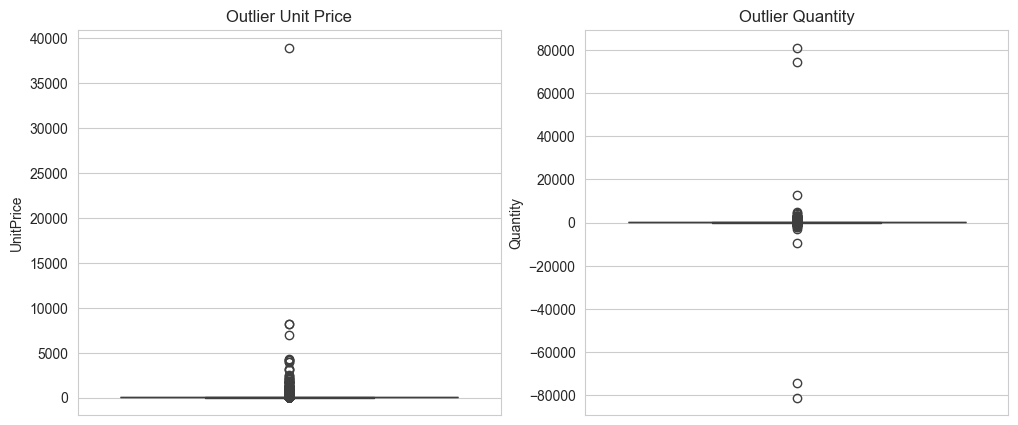

In [48]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=pd['UnitPrice'])
plt.title("Outlier Unit Price")

plt.subplot(1,2,2)
sns.boxplot(y=pd['Quantity'])
plt.title("Outlier Quantity")
plt.show()

In [49]:
# Kita hanya mengambil Quantity > 0 dan UnitPrice > 0
pd[(pd['Quantity'] > 0) & (pd['UnitPrice'] > 0)].copy()

# --- LANGKAH 2: Buat Kolom Total Belanja (Monetary) ---
pd['TotalPrice'] = pd['Quantity'] * pd['UnitPrice']

# Cek statistik setelah pembersihan
print("Statistik Setelah Cleaning (Hanya Transaksi Valid):")
print(pd[['Quantity', 'UnitPrice', 'TotalPrice']].describe())

# --- LANGKAH 3: Cek Outlier Ekstrim (Opsional) ---
# Kadang ada transaksi uji coba dengan harga tidak masuk akal.
# Kita bisa menggunakan Interquartile Range (IQR) untuk melihat batas wajar,
# TAPI untuk RFM, hati-hati menghapus data di atas batas atas (Upper Limit)
# karena itu bisa jadi pelanggan VIP.

Q1 = pd['TotalPrice'].quantile(0.25)
Q3 = pd['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1

# Batas atas outlier statistik
upper_limit = Q3 + (1.5 * IQR)
print(f"\nBatas atas statistik (Upper Limit): {upper_limit}")
print(f"Jumlah transaksi di atas batas wajar: {len(pd[pd['TotalPrice'] > upper_limit])}")

Statistik Setelah Cleaning (Hanya Transaksi Valid):
            Quantity      UnitPrice     TotalPrice
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471      20.401854
std       248.693370      69.315162     427.591718
min    -80995.000000       0.000000 -168469.600000
25%         2.000000       1.250000       4.200000
50%         5.000000       1.950000      11.100000
75%        12.000000       3.750000      19.500000
max     80995.000000   38970.000000  168469.600000

Batas atas statistik (Upper Limit): 42.45
Jumlah transaksi di atas batas wajar: 31241


In [50]:
# Pastikan InvoiceDate bertipe datetime
pd['InvoiceDate'] = pds.to_datetime(pd['InvoiceDate'])

# Tentukan tanggal referensi
reference_date = pd['InvoiceDate'].max() + pds.Timedelta(days=1)

# Agregasi RFM
rfm = pd.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days, # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print("\nPreview Data RFM:")
print(rfm.head())


Preview Data RFM:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          2      0.00
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [51]:
# 1. Cek Penyebab Error (Optional, untuk info saja)
print("Nilai Minimum Data RFM (Cek apakah ada 0 atau negatif):")
print(rfm[['Recency', 'Frequency', 'Monetary']].min())

Nilai Minimum Data RFM (Cek apakah ada 0 atau negatif):
Recency         1.00
Frequency       1.00
Monetary    -4287.63
dtype: float64


In [52]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

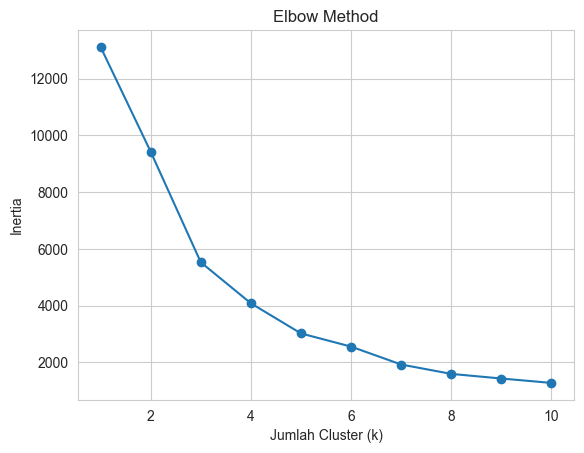

In [53]:
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## baru 


In [54]:
# 1. Tentukan jumlah cluster terbaik (Misal: 3)
k_best = 4

# 2. Jalankan K-Means dengan k tersebut
# Gunakan 'rfm_scaled' (data yang sudah di-log & di-scale)
model_final = KMeans(n_clusters=k_best, random_state=42, n_init=10)
model_final.fit(rfm_scaled)

# 3. Masukkan label cluster ke data ASLI
# Kita pakai 'rfm' (data asli Rupiah/Hari) agar mudah dibaca manusia
rfm['Cluster'] = model_final.labels_

# 4. Cek Rata-rata per Cluster (Profiling)
# Ini untuk mengetahui: "Cluster 0 itu orangnya seperti apa sih?"
print("Profil Setiap Cluster (Rata-rata):")
print(rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count' # Jumlah orang di cluster tersebut
}).round(2))

Profil Setiap Cluster (Rata-rata):
         Recency  Frequency   Monetary  CustomerID
Cluster                                           
0          41.61       4.80    1478.52        3169
1         247.95       1.81     453.49        1087
2           7.67      89.00  182181.98           6
3           9.18      40.67   18441.96         110


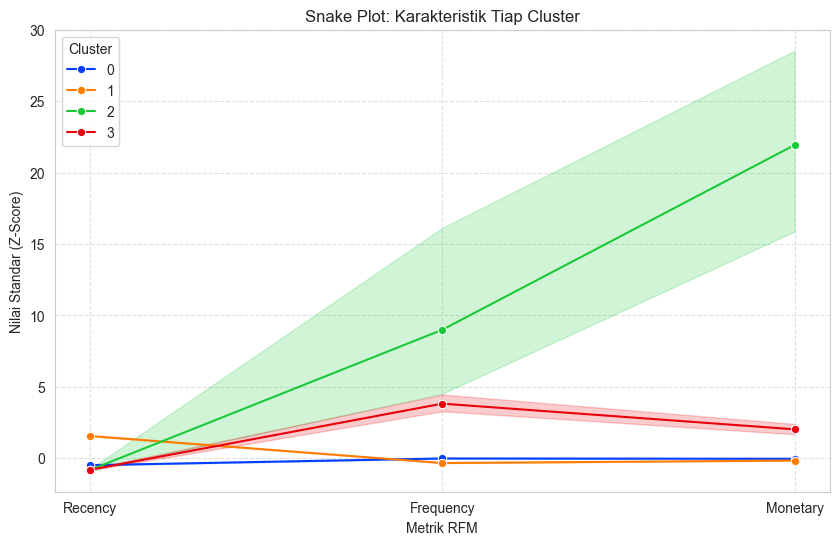

In [57]:
import pandas as pd_lib
# --- Persiapan Data untuk Snake Plot ---
# Gunakan 'pd_lib' bukan 'pd'
df_normalized = pd_lib.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
df_normalized['Cluster'] = rfm['Cluster'] # Ambil label cluster dari data asli

# "Melt" data menjadi format panjang agar bisa dibaca Seaborn
df_melted = pd_lib.melt(df_normalized,
                    id_vars=['Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'],
                    var_name='Metric',
                    value_name='Value')

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Gambar garisnya
sns.lineplot(data=df_melted, x='Metric', y='Value', hue='Cluster', palette='bright', marker='o')

plt.title('Snake Plot: Karakteristik Tiap Cluster')
plt.xlabel('Metrik RFM')
plt.ylabel('Nilai Standar (Z-Score)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

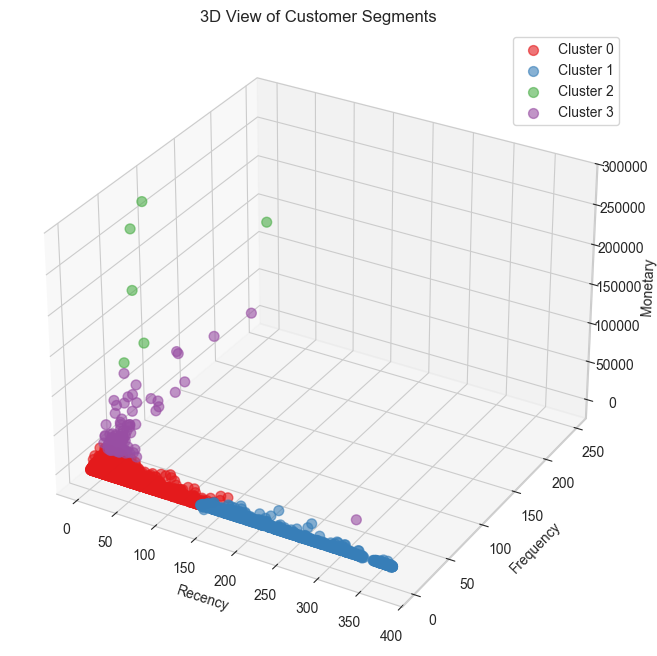

In [58]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap cluster
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3'] # Merah, Biru, Hijau, Ungu

for i in sorted(rfm['Cluster'].unique()):
    # Ambil data per cluster
    subset = rfm[rfm['Cluster'] == i]
    ax.scatter(subset['Recency'], 
               subset['Frequency'], 
               subset['Monetary'], 
               c=colors[i], 
               label=f'Cluster {i}', 
               s=50, alpha=0.6)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D View of Customer Segments')
plt.legend()
plt.show()

## baru 

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          2      0.00        1
1     12347.0        2          7   4310.00        3
2     12348.0       75          4   1797.24        3
3     12349.0       19          1   1757.55        3
4     12350.0      310          1    334.40        1


In [ ]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID':'Count'}).sort_values(by='Monetary', ascending=False)

print("\nCluster Insights:")
print(cluster_summary)


Cluster Insights:
            Recency   Frequency       Monetary  Count
Cluster                                              
2          5.090909  109.909091  124312.306364     11
0         10.752577   28.510309   12168.264691    194
3         42.780906    4.370550    1320.981506   3090
1        248.927577    1.805942     455.110716   1077


In [ ]:
def label_segment(row):
    if row['Cluster'] == cluster_summary.index[0]:
        return 'VIP'
    elif row['Cluster'] == cluster_summary.index[1]:
        return 'Loyal'
    elif row['Cluster'] == cluster_summary.index[2]:
        return 'Potential'
    else:
        return 'At Risk / Lost'

rfm['Segment'] = rfm.apply(label_segment, axis=1)

print("\nSegmentasi Pelanggan:")
print(rfm.head())


Segmentasi Pelanggan:
   CustomerID  Recency  Frequency  Monetary  Cluster         Segment
0     12346.0      326          2      0.00        1  At Risk / Lost
1     12347.0        2          7   4310.00        3       Potential
2     12348.0       75          4   1797.24        3       Potential
3     12349.0       19          1   1757.55        3       Potential
4     12350.0      310          1    334.40        1  At Risk / Lost


C:\Users\faiz\AppData\Local\Temp\ipykernel_28560\2675991138.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=seg_counts.values, y=seg_counts.index, palette="viridis")


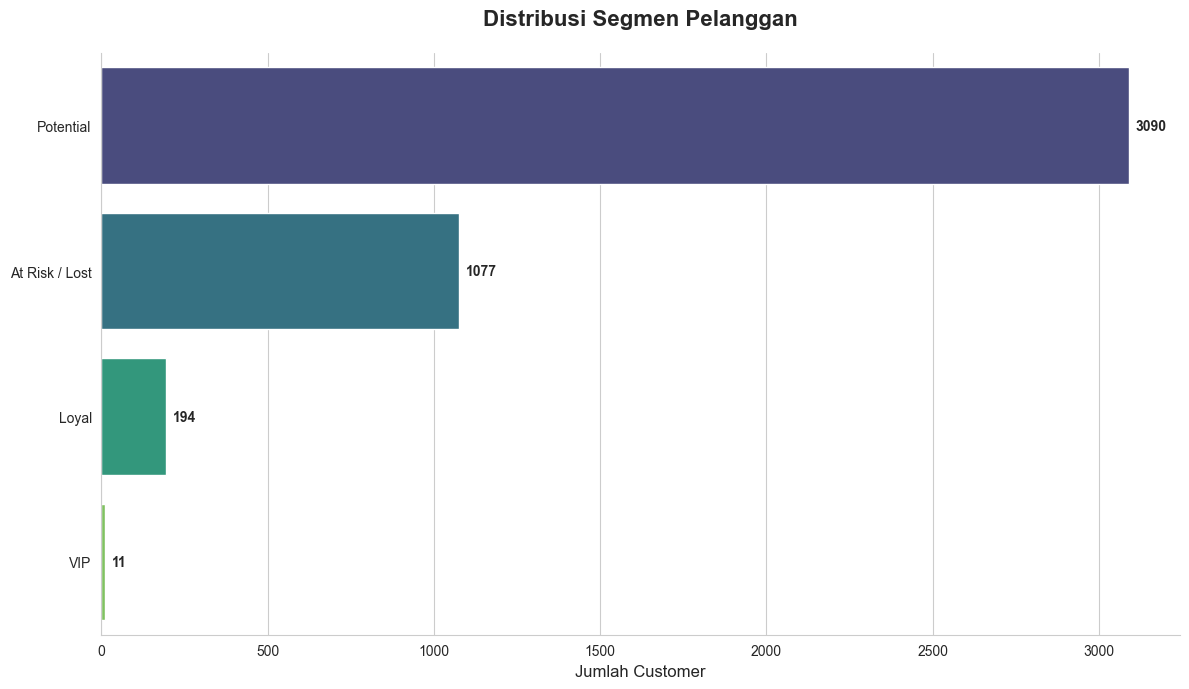

In [ ]:
# --- 2. Membuat Visualisasi ---
# Hitung jumlah customer per segmen & urutkan dari terbanyak
seg_counts = rfm['Segment'].value_counts().sort_values(ascending=False)

# Setup Plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid") # Grid tipis agar mudah dibaca

# Buat Barplot Horizontal (lebih enak dibaca labelnya dibanding vertikal)
ax = sns.barplot(x=seg_counts.values, y=seg_counts.index, palette="viridis")

# Percantik Tampilan
plt.title('Distribusi Segmen Pelanggan', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Jumlah Customer', fontsize=12)
plt.ylabel(None) # Hilangkan label Y agar bersih

# Tambahkan Angka (Data Labels) di ujung setiap bar
for i in ax.containers:
    ax.bar_label(i, padding=5, fontsize=10, fontweight='bold')

# Hapus border atas dan kanan agar lebih modern
sns.despine()

plt.tight_layout()
plt.show()

## CHat BOX


In [ ]:
def rfm_chatbot(pertanyaan):
    """
    Fungsi chatbot sederhana untuk query data RFM.
    """
    pertanyaan = pertanyaan.lower() # Ubah ke huruf kecil agar tidak case-sensitive
    
    # 1. Identifikasi Segmen yang dimaksud user
    target_segment = None
    
    # Mapping kata kunci user ke nama segmen di data
    if 'potential' in pertanyaan:
        target_segment = 'Potential Loyalists'
    elif 'champions' in pertanyaan:
        target_segment = 'Champions'
    elif 'loyal' in pertanyaan:
        target_segment = 'Loyal Customers'
    elif 'risk' in pertanyaan:
        target_segment = 'At Risk'
    elif 'hibernate' in pertanyaan or 'hibernating' in pertanyaan:
        target_segment = 'Hibernating'
    elif 'lost' in pertanyaan or 'lose' in pertanyaan:
        target_segment = "Can't Lose"
    # Tambahkan kondisi lain sesuai nama segmen Anda
    
    # 2. Logika Menjawab
    if target_segment:
        # Filter data berdasarkan segmen
        data_filtered = rfm[rfm['Segment'] == target_segment]
        jumlah_user = len(data_filtered)
        
        # Ambil daftar ID (maksimal 50 agar layar tidak penuh)
        list_id = data_filtered['CustomerID'].tolist()
        
        # Format output ID (jika banyak, tampilkan sebagian saja)
        if jumlah_user > 20:
            id_str = ", ".join(map(str, list_id[:20])) + f", ... dan {jumlah_user - 20} lainnya."
        else:
            id_str = ", ".join(map(str, list_id))
            
        return (f"📊 **Laporan Segmen {target_segment}**\n"
                f"👥 Total Pelanggan: {jumlah_user} orang\n"
                f"🆔 Daftar Customer ID:\n{id_str}")
    
    else:
        return "Maaf, saya tidak mengenali nama segmen tersebut. Coba gunakan kata kunci seperti 'Potential', 'Champions', atau 'Risk'."

    # --- CARA PAKAI ---
    # Ketik pertanyaan Anda di sini
    print(rfm_chatbot("Berapa orang di potential loyalist?"))

    while True:
        tanya = input("Anda: ")
        if tanya.lower() == 'keluar':
            break
        print("Bot: ", rfm_chatbot(tanya))
        print("-" * 30)

# Recency: Makin kecil makin bagus (label: 5, 4, 3, 2, 1)

In [ ]:
#rfm['R_Score'] = pds.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2,     1])

# Frequency: Makin besar makin bagus (label: 1, 2, 3, 4, 5)

In [ ]:
#rfm['F_Score'] = pds.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetary: Makin besar makin bagus (label: 1, 2, 3, 4, 5)

In [ ]:
#rfm['M_Score'] = pds.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Gabungkan Skor (RFM Segment)

In [ ]:
#rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Buat Kolom 'Score' Total

In [ ]:
#rfm['RFM_Score_Total'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [ ]:
#print("Contoh Hasil Scoring:")
#print(rfm.head())

# Mapping ke Nama Segmen (Sederhana Berdasarkan Recency & Frequency)

In [ ]:
'''segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}'''

'''rfm['Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)'''

#print("\nJumlah Customer per Segmen:")
#print(rfm['Segment'].value_counts())

"rfm['Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)\nrfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)"

In [ ]:
'''def _find_dataframe():
    g = globals()
    if 'df' in g and isinstance(g['df'], pds.DataFrame):
        return g['df']
    if 'pd' in g and isinstance(g['pd'], pds.DataFrame):
        return g['pd']
    for name, val in g.items():
        if isinstance(val, pds.DataFrame):
            print(f"Using DataFrame from variable '{name}'")
            return val
    raise RuntimeError('Tidak menemukan DataFrame di environment. Pastikan dataset telah dimuat.')

df = _find_dataframe()'''

'def _find_dataframe():\n    g = globals()\n    if \'df\' in g and isinstance(g[\'df\'], pds.DataFrame):\n        return g[\'df\']\n    if \'pd\' in g and isinstance(g[\'pd\'], pds.DataFrame):\n        return g[\'pd\']\n    for name, val in g.items():\n        if isinstance(val, pds.DataFrame):\n            print(f"Using DataFrame from variable \'{name}\'")\n            return val\n    raise RuntimeError(\'Tidak menemukan DataFrame di environment. Pastikan dataset telah dimuat.\')\n\ndf = _find_dataframe()'

In [ ]:
'''# Ganti sesuai CustomerID yang ingin dicek
customer_id = 17850.0

# Pastikan kolom numeric benar dan buat kolom TotalPrice
df['Quantity'] = pds.to_numeric(df['Quantity'], errors='coerce').fillna(0)
df['UnitPrice'] = pds.to_numeric(df['UnitPrice'], errors='coerce').fillna(0)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

cust_df = df[df['CustomerID'] == customer_id].copy()

if cust_df.empty:
    print(f"Tidak ada data untuk CustomerID = {customer_id}")
else:
    total_spent = cust_df['TotalPrice'].sum()
    unique_items = cust_df['Description'].nunique()
    unique_invoices = cust_df['InvoiceNo'].nunique() if 'InvoiceNo' in cust_df.columns else 'N/A'

    print(f"CustomerID: {customer_id}")
    print(f"Total transaksi (InvoiceNo unik): {unique_invoices}")
    print(f"Jumlah jenis barang yang dibeli (unik): {unique_items}")
    print(f"Total yang dihabiskan: {total_spent:.2f}\n")

    items_summary = (
        cust_df.groupby('Description', dropna=False)
        .agg(total_quantity=('Quantity', 'sum'), total_spent=('TotalPrice', 'sum'))
        .sort_values('total_spent', ascending=False)
    )

    # Tampilkan semua atau gunakan .head(n)
    print(items_summary.head(50))'''

'# Ganti sesuai CustomerID yang ingin dicek\ncustomer_id = 17850.0\n\n# Pastikan kolom numeric benar dan buat kolom TotalPrice\ndf[\'Quantity\'] = pds.to_numeric(df[\'Quantity\'], errors=\'coerce\').fillna(0)\ndf[\'UnitPrice\'] = pds.to_numeric(df[\'UnitPrice\'], errors=\'coerce\').fillna(0)\ndf[\'TotalPrice\'] = df[\'Quantity\'] * df[\'UnitPrice\']\n\ncust_df = df[df[\'CustomerID\'] == customer_id].copy()\n\nif cust_df.empty:\n    print(f"Tidak ada data untuk CustomerID = {customer_id}")\nelse:\n    total_spent = cust_df[\'TotalPrice\'].sum()\n    unique_items = cust_df[\'Description\'].nunique()\n    unique_invoices = cust_df[\'InvoiceNo\'].nunique() if \'InvoiceNo\' in cust_df.columns else \'N/A\'\n\n    print(f"CustomerID: {customer_id}")\n    print(f"Total transaksi (InvoiceNo unik): {unique_invoices}")\n    print(f"Jumlah jenis barang yang dibeli (unik): {unique_items}")\n    print(f"Total yang dihabiskan: {total_spent:.2f}\n")\n\n    items_summary = (\n        cust_df.groupby(\'